In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 12 10:00:57 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
ms = [20,30,40,25,35] 
ns = [30,40,25,35,20]
params = ob.sc_params(ms, ns)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 200
memory = [20, 50, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=inf, L=-1904.0328257882975, U=4135.211122321269
k=1, rel_gap=inf, L=-1372.4852960661656, U=4135.211122321269
k=2, rel_gap=inf, L=-1312.8912513324922, U=2596.1190094390377
k=3, rel_gap=inf, L=-1267.333332596685, U=2264.904578938392
k=4, rel_gap=inf, L=-996.0323450065343, U=1256.0972271436303
k=5, rel_gap=inf, L=-935.2422093668838, U=609.1100273443794
k=6, rel_gap=inf, L=-890.3069961068913, U=402.35789439793757
k=7, rel_gap=inf, L=-725.7390270213123, U=253.06416723023108
k=8, rel_gap=inf, L=-637.817952529407, U=165.62938357948838
k=9, rel_gap=inf, L=-478.39680490095225, U=137.79695271473474
k=10, rel_gap=inf, L=-432.03873079967093, U=71.07854687480926
k=11, rel_gap=inf, L=-342.0871607158556, U=71.07854687480926
k=12, rel_gap=inf, L=-329.7657043079105, U=19.74567940369775
k=13, rel_gap=inf, L=-267.5798798902049, U=18.067802018242617
k=14, rel_gap=6.790809015960411, L=-253.57082040617274, U=-32.54743119574647
k=15, rel_gap=5.301883304451877, L=-228.76449269831983, U=-36.300972

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=61, rel_gap=0.44863546254741554, L=-116.79498887869977, U=-80.62414037090917
k=62, rel_gap=1.042625235212631, L=-164.91929627836043, U=-80.73889102872698
k=63, rel_gap=1.0078258900171948, L=-162.10963573875506, U=-80.73889102872698
k=64, rel_gap=0.9769064359082742, L=-159.6132333027872, U=-80.73889102872698
k=65, rel_gap=0.9553338265226806, L=-157.87148474439846, U=-80.73889102872698
k=66, rel_gap=0.9183538509220587, L=-154.88576252413486, U=-80.73889102872698
k=67, rel_gap=0.95011969774294, L=-157.45050176904124, U=-80.73889102872698
k=68, rel_gap=0.9038829250108251, L=-153.717396013903, U=-80.73889102872698
k=69, rel_gap=0.7986235702722169, L=-145.2188724419084, U=-80.73889102872698
k=70, rel_gap=0.40619061743238066, L=-113.5342710264913, U=-80.73889102872698
k=71, rel_gap=0.8174192073728604, L=-147.93811343468178, U=-81.40010451883097
k=72, rel_gap=0.7578612179667815, L=-143.09008687209553, U=-81.40010451883097
k=73, rel_gap=0.7173024285226697, L=-139.78859717218756, U=-81.4001045

k=167, rel_gap=0.10082257681754835, L=-90.57096404101117, U=-82.27571449601774
k=168, rel_gap=0.1969667293602805, L=-98.52003164595294, U=-82.30807860349387
k=169, rel_gap=0.18913607703052965, L=-97.87550569847917, U=-82.30807860349387
k=170, rel_gap=0.1688386781118577, L=-96.20486579283465, U=-82.30807860349387
k=171, rel_gap=0.16036123553369322, L=-95.50710378275448, U=-82.30807860349387
k=172, rel_gap=0.12722674891993138, L=-92.77986785406256, U=-82.30807860349387
k=173, rel_gap=0.11975868680282542, L=-92.16518601031203, U=-82.30807860349387
k=174, rel_gap=0.11822566829298571, L=-92.06682296799886, U=-82.33295441030467
k=175, rel_gap=0.11563852680972721, L=-91.88354738208295, U=-82.359604095811
k=176, rel_gap=0.1022685731187696, L=-90.79083152391331, U=-82.36725035807638
k=177, rel_gap=0.090541452508579, L=-89.82490084463439, U=-82.36725035807638
k=178, rel_gap=0.08441879848641579, L=-89.32059466793498, U=-82.36725035807638
k=179, rel_gap=0.07385850629088608, L=-88.45077243681135, U

k=75, rel_gap=0.2650696896857596, L=-101.85039093478895, U=-80.50970769846549
k=76, rel_gap=0.2611535036006732, L=-101.53509993778584, U=-80.50970769846549
k=77, rel_gap=0.2118518925858858, L=-97.56584164592186, U=-80.50970769846549
k=78, rel_gap=0.20142348026826445, L=-97.36356245886896, U=-81.0401694805638
k=79, rel_gap=0.18819601634052063, L=-96.5484028639587, U=-81.25629234249953
k=80, rel_gap=0.17891864384299647, L=-95.79455797212961, U=-81.25629234249953
k=81, rel_gap=0.17385822384396757, L=-95.39478173548093, U=-81.26601645563039
k=82, rel_gap=0.16979095687398602, L=-95.06425115096897, U=-81.26601645563039
k=83, rel_gap=0.16712466901233577, L=-94.84757255772865, U=-81.26601645563039
k=84, rel_gap=0.16447847657761797, L=-94.64697477411164, U=-81.27842349845525
k=85, rel_gap=0.16086748329168146, L=-94.35347893256721, U=-81.27842349845525
k=86, rel_gap=0.15825693699752552, L=-94.14129784530849, U=-81.27842349845525
k=87, rel_gap=0.19523289796938398, L=-97.14664566044155, U=-81.2784

k=180, rel_gap=0.033355799601586425, L=-85.44374754446903, U=-82.68569990840729
k=181, rel_gap=0.03178731435974524, L=-85.32531736200667, U=-82.69661409333528
k=182, rel_gap=0.030528129052775917, L=-85.22118700060423, U=-82.69661409333528
k=183, rel_gap=0.027879618562990146, L=-85.00216415070827, U=-82.69661409333528
k=184, rel_gap=0.026760660772689588, L=-84.91352595933245, U=-82.70040838478434
k=185, rel_gap=0.025372808822001054, L=-84.80791469400265, U=-82.70934626346701
k=186, rel_gap=0.023717924742482292, L=-84.67258115613413, U=-82.7108514070745
k=187, rel_gap=0.15420102805556313, L=-95.46494972539631, U=-82.7108514070745
k=188, rel_gap=0.14828020117502683, L=-94.97523309307326, U=-82.7108514070745
k=189, rel_gap=0.14362917437647835, L=-94.5905427066482, U=-82.7108514070745
k=190, rel_gap=0.1405502185199108, L=-94.3358796463067, U=-82.7108514070745
k=191, rel_gap=0.13384429752258314, L=-93.78122721114914, U=-82.7108514070745
k=192, rel_gap=0.1298603265680655, L=-93.45170958151994

k=89, rel_gap=0.12348672925557437, L=-91.41268251413499, U=-81.36516447747033
k=90, rel_gap=0.12091450401230995, L=-91.22155898084623, U=-81.38137088450452
k=91, rel_gap=0.11839120240045468, L=-91.01620923651836, U=-81.38137088450452
k=92, rel_gap=0.11546297740353621, L=-90.8934988261314, U=-81.48499830779167
k=93, rel_gap=0.11097176285827863, L=-90.56732111353199, U=-81.52081280672948
k=94, rel_gap=0.10460369901290376, L=-90.13412500582592, U=-81.59860870135742
k=95, rel_gap=0.10244534490762708, L=-90.07433059319635, U=-81.70412348264176
k=96, rel_gap=0.0978054872391728, L=-89.77096497732418, U=-81.77310645721548
k=97, rel_gap=0.09394306088135278, L=-89.52836619506218, U=-81.84006041679373
k=98, rel_gap=0.09016302196112085, L=-89.33663068767487, U=-81.9479553864935
k=99, rel_gap=0.087611700991563, L=-89.1784233255205, U=-81.9947259157083
k=100, rel_gap=0.08179232023444592, L=-88.77563542792655, U=-82.0634735220593
k=101, rel_gap=0.0784489964990369, L=-88.53322289487346, U=-82.09310146

k=193, rel_gap=0.01043625697526131, L=-83.62151238352635, U=-82.7578303987697
k=194, rel_gap=0.010388606259710702, L=-83.61756891369043, U=-82.7578303987697
k=195, rel_gap=0.010372168100338473, L=-83.61620852728504, U=-82.7578303987697
k=196, rel_gap=0.010350967189075948, L=-83.61445398586648, U=-82.7578303987697
k=197, rel_gap=0.010010538995021802, L=-83.58628088711998, U=-82.7578303987697
k=198, rel_gap=0.010003553099625065, L=-83.58570274957356, U=-82.7578303987697
k=199, rel_gap=0.009950834851950897, L=-83.58133990177362, U=-82.7578303987697


# Centralized solution

In [5]:
h_cvx = ob.cvx_supply_chain(params=params)[0]

# Plot

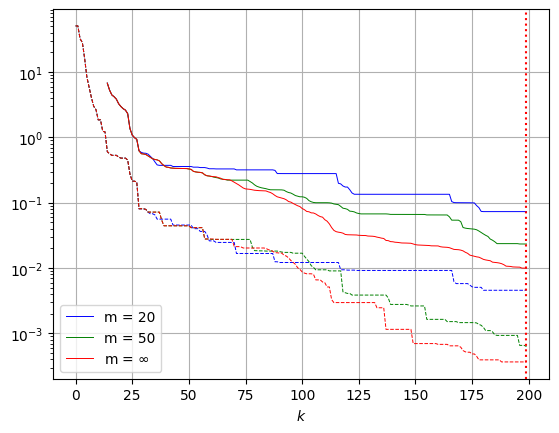

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)